## 4.- Compute global statistics

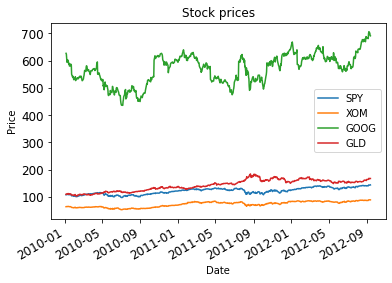


 mean
 SPY     121.711206
XOM      73.296221
GOOG    568.941941
GLD     142.603279
dtype: float64

 median
 SPY     123.305
XOM      76.440
GOOG    578.845
GLD     146.440
dtype: float64

 standard deviation
 SPY     11.626556
XOM     10.168104
GOOG    54.068129
GLD     20.562938
dtype: float64


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp=pd.read_csv(f"{symbol}.csv", index_col='Date',
                        parse_dates=True, usecols=['Date', 'Adj Close'],
                        na_values=['nan'])
                        
        df_temp = df_temp.rename(columns={'Adj Close':symbol})
        df=df.join(df_temp)
        df = df.dropna()
    return df

def plot_data(df, title = "Stock prices"):
  ax = df.plot(title=title, fontsize=12)
  ax.set_xlabel("Date")
  ax.set_ylabel("Price")
  plt.show()

def test_run():
  # Read data
  dates = pd.date_range('2010-01-01', '2012-12-31')
  symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
  df = get_data(symbols, dates)
  plot_data(df)

  # Compute global statistics fol each stock
  print("\n mean\n",df.mean())
  print("\n median\n",df.median())
  print("\n standard deviation\n",df.std())


if __name__ == "__main__":
  test_run()

## 8.- Computing Rolling Statistics

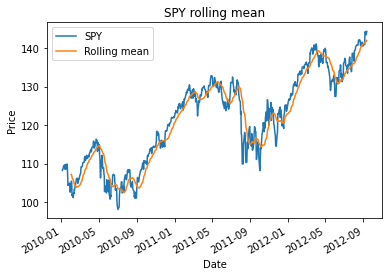

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp=pd.read_csv(f"{symbol}.csv", index_col='Date',
                        parse_dates=True, usecols=['Date', 'Adj Close'],
                        na_values=['nan'])
                        
        df_temp = df_temp.rename(columns={'Adj Close':symbol})
        df=df.join(df_temp)
        df = df.dropna()
    return df

def plot_data(df, title = "Stock prices"):
  ax = df.plot(title=title, fontsize=12)
  ax.set_xlabel("Date")
  ax.set_ylabel("Price")
  plt.show()

def test_run():
  # Read data
  dates = pd.date_range('2010-01-01', '2012-12-31')
  symbols = ['SPY']
  df = get_data(symbols, dates)
  #plot_data(df)

  # Plot SPY data, retain matplotlib axis object
  ax = df['SPY'].plot(title="SPY rolling mean", label='SPY')

  # Compute rolling mean using a 20-day window
  # rm_SPY = pd.rolling_mean(df['SPY'], window=20)
  rm_SPY = df['SPY'].rolling(20).mean()

  # Add rolling mean to some plot
  rm_SPY.plot(label='Rolling mean', ax=ax)

  # Add axis labels and legend
  ax.set_xlabel("Date")
  ax.set_ylabel("Price")
  ax.legend(loc='upper left')
  plt.show()

if __name__ == "__main__":
  test_run()

## 9.- Calculate bollinger bands

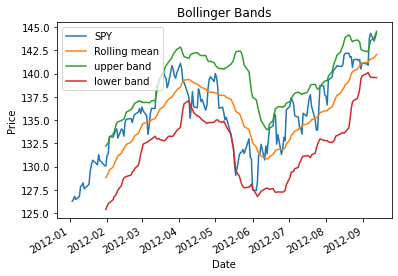

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp=pd.read_csv(f"{symbol}.csv", index_col='Date',
                        parse_dates=True, usecols=['Date', 'Adj Close'],
                        na_values=['nan'])
                        
        df_temp = df_temp.rename(columns={'Adj Close':symbol})
        df=df.join(df_temp)
        df = df.dropna()
    return df

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    #rm_SPY = df['SPY'].rolling(20).mean()
    return values.rolling(window).mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return values.rolling(window).std()


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm + rstd * 2
    lower_band = rm - rstd * 2
    return upper_band, lower_band


def test_run():
    # Read data
    dates = pd.date_range('2012-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)

    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df['SPY'], window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()


if __name__ == "__main__":
    test_run()

## 11.- Compute daily returns

In [ ]:
"""Compute daily returns."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    # daily_returns = (df / df.shift(1)) - 1 # using pandas
    daily_returns.ix[0, :] = 0
    return daily_returns



def test_run():
    # Read data
    dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")


if __name__ == "__main__":
    test_run()
